<a href="https://colab.research.google.com/github/Zakichanu/KiEstCho/blob/master/ProjetNot%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librairie

In [ ]:
!pip install folium
!pip install calmap

In [ ]:
import json
import random
from urllib.request import urlopen

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import calmap
import folium

# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("drive/MyDrive/TD_Noté/valeursfoncieres-2020.txt", sep="|")

In [ ]:
df.head()

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2020,Vente,"8000,00",NaN,NaN,NaN,B063,FORTUNAT,1250.0,CEYZERIAT,1,72,NaN,AK,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1061.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B124,TERRES DES CINQ SAULES,1290.0,LAIZ,1,203,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,85.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B006,BOIS DU CHAMP RION,1290.0,LAIZ,1,203,NaN,B,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1115.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B025,EN COROBERT,1290.0,LAIZ,1,203,NaN,B,477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1940.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B124,TERRES DES CINQ SAULES,1290.0,LAIZ,1,203,NaN,C,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1148.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2459560 entries, 0 to 2459559
Data columns (total 43 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Code service CH             float64
 1   Reference document          float64
 2   1 Articles CGI              float64
 3   2 Articles CGI              float64
 4   3 Articles CGI              float64
 5   4 Articles CGI              float64
 6   5 Articles CGI              float64
 7   No disposition              int64  
 8   Date mutation               object 
 9   Nature mutation             object 
 10  Valeur fonciere             object 
 11  No voie                     float64
 12  B/T/Q                       object 
 13  Type de voie                object 
 14  Code voie                   object 
 15  Voie                        object 
 16  Code postal                 float64
 17  Commune                     object 
 18  Code departement            object 
 19  Code commune         

In [ ]:
df.describe()

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,No voie,Code postal,Code commune,Prefixe de section,No plan,4eme lot,5eme lot,Nombre de lots,Code type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Surface terrain
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.459560e+06,1.469215e+06,2.428568e+06,2.459560e+06,109006.000000,2.459560e+06,8911.000000,4143.000000,2.459560e+06,1.315834e+06,0.0,1.314270e+06,1.314270e+06,1.691885e+06
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.075359e+00,6.977083e+02,5.178363e+04,2.123115e+02,400.714291,4.061556e+02,115.153181,129.230268,3.914603e-01,1.957431e+00,NaN,8.863523e+01,2.501026e+00,2.862449e+03
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.593660e-01,2.017514e+03,2.724141e+04,1.688075e+02,303.710728,5.636461e+02,507.358824,559.314545,7.716914e-01,9.437598e-01,NaN,7.503979e+02,2.112756e+00,1.609481e+04
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+03,1.000000e+00,1.000000,1.000000e+00,2.000000,2.000000,0.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,8.000000e+00,3.125000e+04,7.800000e+01,159.000000,8.600000e+01,7.000000,8.000000,0.000000e+00,1.000000e+00,NaN,1.800000e+01,0.000000e+00,2.260000e+02
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,2.400000e+01,5.070000e+04,1.770000e+02,297.000000,2.250000e+02,22.000000,26.000000,0.000000e+00,2.000000e+00,NaN,6.300000e+01,3.000000e+00,5.930000e+02
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,8.800000e+01,7.660000e+04,3.040000e+02,810.000000,5.050000e+02,69.000000,74.000000,1.000000e+00,3.000000e+00,NaN,9.600000e+01,4.000000e+00,1.710000e+03
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.400000e+01,9.999000e+03,9.749000e+04,9.090000e+02,950.000000,9.798000e+03,20027.000000,20028.000000,1.500000e+02,4.000000e+00,NaN,2.182900e+05,1.090000e+02,1.072309e+07


In [ ]:
plt.rcParams["figure.figsize"] = (20,6)

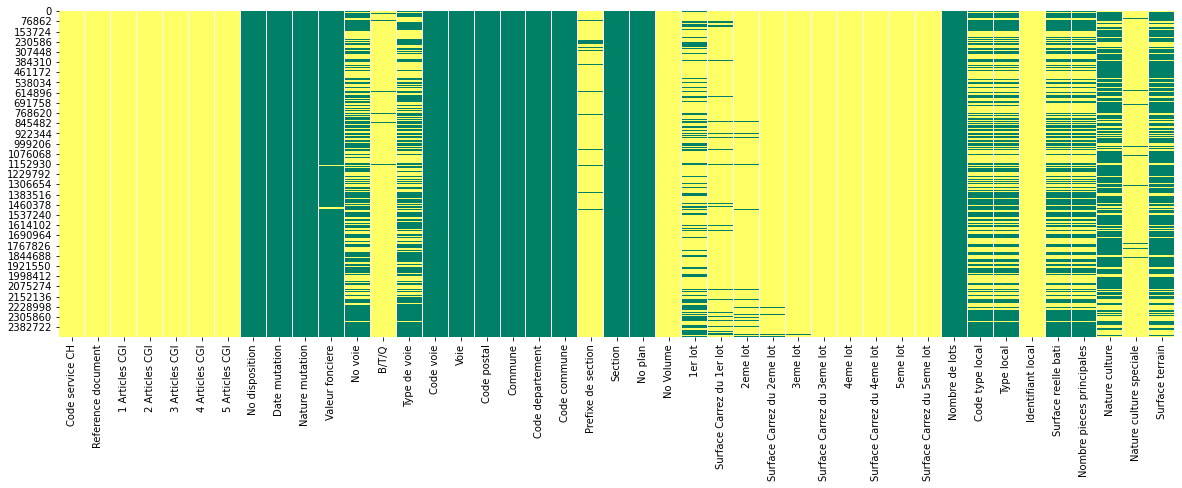

In [ ]:
sns.heatmap(df.isnull(), cbar=False , cmap="summer")

In [ ]:
df = df[df.columns[df.isnull().mean() < 0.8]]


In [ ]:
df.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,1,07/01/2020,Vente,"8000,00",NaN,NaN,B063,FORTUNAT,1250.0,CEYZERIAT,1,72,AK,216,NaN,0,NaN,NaN,NaN,NaN,T,1061.0
1,1,02/01/2020,Vente,"2175,00",NaN,NaN,B124,TERRES DES CINQ SAULES,1290.0,LAIZ,1,203,B,4,NaN,0,NaN,NaN,NaN,NaN,BT,85.0
2,1,02/01/2020,Vente,"2175,00",NaN,NaN,B006,BOIS DU CHAMP RION,1290.0,LAIZ,1,203,B,173,NaN,0,NaN,NaN,NaN,NaN,T,1115.0
3,1,02/01/2020,Vente,"2175,00",NaN,NaN,B025,EN COROBERT,1290.0,LAIZ,1,203,B,477,NaN,0,NaN,NaN,NaN,NaN,T,1940.0
4,1,02/01/2020,Vente,"2175,00",NaN,NaN,B124,TERRES DES CINQ SAULES,1290.0,LAIZ,1,203,C,68,NaN,0,NaN,NaN,NaN,NaN,T,1148.0


In [ ]:


def calcul_metre_carre(row):
    return float(row['Valeur fonciere']) / float(row['Surface terrain']) if float(row['Surface terrain']) else 0

df["Valeur fonciere"] = df["Valeur fonciere"].str.replace(',','.').astype(float)

df["Prix m²"] = df.apply(calcul_metre_carre, axis=1)

df["Prix m²"]

0             7.540057
1            25.588235
2             1.950673
3             1.121134
4             1.894599
              ...     
2459555    4334.451902
2459556    4334.451902
2459557    4334.451902
2459558    4334.451902
2459559            NaN
Name: Prix m², Length: 2459560, dtype: float64

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Prix du m² des maisons par département


In [ ]:
df[df["Code type local"] == 1].groupby(by=["Code departement"]).mean().sort_values(by=["Prix m²"])[["Valeur fonciere","Surface terrain","Prix m²"]].style.background_gradient(cmap='YlOrBr')

,Valeur fonciere,Surface terrain,Prix m²
Code departement,,,
23,85444.632275,1195.606731,217.313094
36,106756.012352,1476.505986,265.070487
71,138240.068335,1064.064530,268.308288
52,96951.008414,743.571641,272.179488
19,132253.245398,1166.253798,275.476991
88,136226.527676,886.308765,277.364395
3,122903.192481,1290.033536,279.683173
58,103144.169003,847.318110,279.975640
55,105232.296280,623.069246,280.097880


#Prix du m² des appartement par département

In [ ]:
df[df["Code type local"] == 2].groupby(by=["Code departement"]).mean().sort_values(by=["Prix m²"])[["Valeur fonciere","Surface terrain","Prix m²"]].style.background_gradient(cmap='YlOrBr')

,Valeur fonciere,Surface terrain,Prix m²
Code departement,,,
88,135058.257830,690.536922,435.669663
70,137307.655347,891.365260,506.667096
71,118858.249349,811.146526,511.914202
39,181381.353320,1026.587719,538.654744
19,118330.699922,535.146429,541.164472
29,114827.982222,889.500000,553.189649
23,139495.271930,839.703704,555.204898
12,117009.102410,613.619048,597.292336
15,158539.861012,864.977654,608.834902


In [68]:
corr_matrix = df.corr()
print(corr_matrix["your_target_variable"].sort_values(ascending=False))

KeyError: ignored

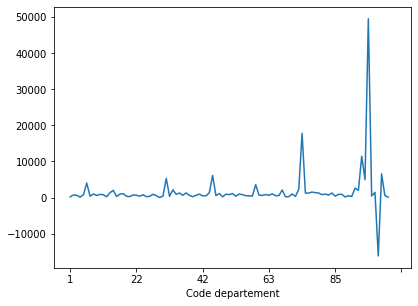

In [ ]:

data = df[df["Code type local"] == 2].groupby(by=["Code departement"]).mean()["Prix m²"] - df[df["Code type local"] == 1].groupby(by=["Code departement"]).mean()["Prix m²"]
data.plot()
#sns.countplot(x = "Prix m²",data=data)

In [ ]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

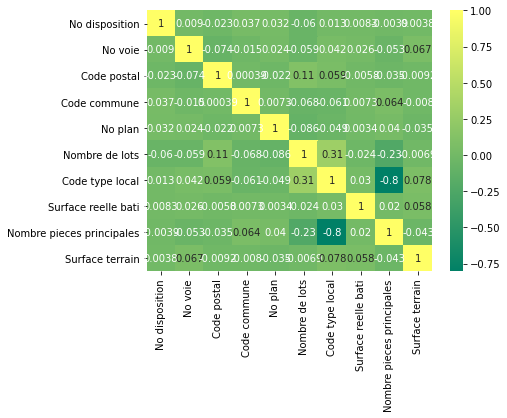

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='summer')

In [ ]:
df["Valeur fonciere"]

0             8000,00
1             2175,00
2             2175,00
3             2175,00
4             2175,00
              ...    
2459555    1937500,00
2459556    1937500,00
2459557    1937500,00
2459558    1937500,00
2459559     255000,00
Name: Valeur fonciere, Length: 2459560, dtype: object